In [1]:
%load_ext autoreload
%autoreload 2
import VAE

In [2]:
import pickle

PICKLE_DIR = '/home/solnik/floor_plans/Final Projects/pickles'

def save(obj, name, pickle_dir=PICKLE_DIR):
    print(f"SAVING {pickle_dir}/{name} ")
    with open(f'{pickle_dir}/{name}', "wb") as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load(name, pickle_dir=PICKLE_DIR):
    with open(f'{pickle_dir}/{name}', "rb") as handle:
        return pickle.load(handle)

In [3]:
real = load('Real')
simple_cat = load('Predictions Simple Categorical')
simple_cont = load('Predictions Simple Continuous Bernoulli')
bed_bath_alpha_100_cont = load('Continuous Bernoulli Bed-Bath Model with alpha = 100')
bed_bath_alpha_100_cat = load('Categorical Bed-Bath Model with alpha 100')
bed_bath_alpha_0_cont = load('Continuous Bed-Bath Model with alpha 0')
bed_bath_alpha_0_cat = load('Categorical Bed-Bath Model with alpha 0')

In [73]:
res = [real, simple_cont,simple_cat, bed_bath_alpha_100_cont, bed_bath_alpha_100_cat, bed_bath_alpha_0_cont, bed_bath_alpha_0_cat]
res_names = ['Real', 'Bernoulli', 'Categorical',  'Bernoulli', 'Categorical', 'Bernoulli', 'Categorical']

In [6]:
import matplotlib.pyplot as plt

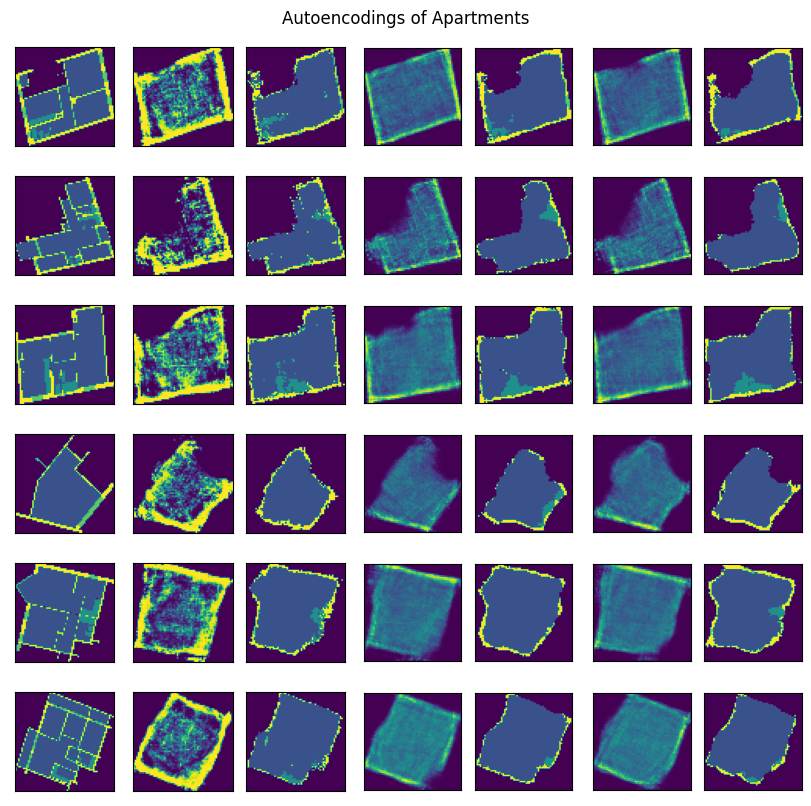

In [79]:
#subplot(r,c) provide the no. of rows and columns
f = plt.figure(figsize=(8, 8), constrained_layout=True)
f.suptitle('Autoencodings of Apartments')
subfigs = f.subfigures(1, 3, width_ratios=[1, 2, 4])

def plot_model(model, axarr, j=None):
    for i in range(6):
        ax = axarr[i]
        if j is not None:
            ax = ax[j]
        ax.imshow(res[model][i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

axarr = subfigs[0].subplots(6, 1, sharex=True, sharey=True)
plot_model(0, axarr)
# subfigs[0].suptitle("Real")
# subfigs[1].suptitle("Simple Models")
# subfigs[2].suptitle("Bed-Bath Models")


subfigsnest = subfigs[1].subfigures(1, 1)
#subfigsnest.suptitle('HI')

axarr = subfigsnest.subplots(6, 2, sharex=True, sharey=True)
plot_model(1, axarr, 0)
#axarr[0][0].set_title(res_names[1])
plot_model(2, axarr, 1)
#axarr[0][1].set_title(res_names[2])

subfigsnest = subfigs[2].subfigures(1, 2)
#subfigsnest[0].suptitle('α = 100')
#subfigsnest[1].suptitle('α = 0')

axarr = subfigsnest[0].subplots(6, 2, sharex=True, sharey=True)
plot_model(3, axarr, 0)
#axarr[0][0].set_title(res_names[3])
plot_model(4, axarr, 1)
#axarr[0][1].set_title(res_names[4])

axarr = subfigsnest[1].subplots(6, 2, sharex=True, sharey=True)
plot_model(5, axarr, 0)
#axarr[0][0].set_title(res_names[5])
plot_model(6, axarr, 1)
#axarr[0][1].set_title(res_names[6])

# plt.tight_layout()
plt.show()